<a href="https://colab.research.google.com/github/DonJM/Applying-Computer-Vision-and-Image-Processing-to-Lessen-the-Fruit-Spoilage-of-Lakatan-Banana/blob/master/FCLB_TFOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Install Modules and Libraries

In [4]:
!pip install wget
!git clone https://github.com/DonJM/FCLB_Dataset.git
!git clone https://github.com/DonJM/Setup.git

#import neccessary python modules and libraries
import os
import shutil
from FCLB_Dataset.FCLB_Dataset import FCLB_Datasets
from Setup.Setup import Setup_Path
import wget

fatal: destination path 'FCLB_Dataset' already exists and is not an empty directory.
Cloning into 'Setup'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


# Preparing Workspace

Creating a workspace directory

In [5]:
setup = Setup_Path()
workspaces = setup.getWorkspaces()
files = setup.files('ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8', 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz')
# files = setup.files('ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8', 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
for workspace in workspaces.values():
  if not os.path.exists(workspace):
    os.makedirs(workspace)
         

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Augmentation

Create label directory for original images and preprocessed images

segment images and copy to preprocessed directory

In [ ]:
dataset = FCLB_Datasets(setup)
dataset.segment()

# Image Labelling

Compress of Image Labeling

In [ ]:
TRAIN_PATH = workspaces['TRAINING_IMAGES_PATH']
TEST_PATH = workspaces['TESTING_IMAGES_PATH']
ARCHIVE_PATH = os.path.join(workspaces['IMAGES_PATH'], 'archive.tar.gz')

In [ ]:
!tar -czf {ARCHIVE_PATH} {TRAIN_PATH} {TEST_PATH}

# Download Tensorflow Object Detection API

In [7]:
tfod_api = workspaces['TFOD_API_PATH']
!cd {tfod_api} && git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 64139, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (398/398), done.
remote: Total 64139 (delta 295), reused 155 (delta 30), pack-reused 63711
Receiving objects: 100% (64139/64139), 574.96 MiB | 29.27 MiB/s, done.
Resolving deltas: 100% (44842/44842), done.


# Install Object Detection

In [8]:
research_path = os.path.join(workspaces['TFOD_API_PATH'], 'models', 'research')
!cd {research_path} && cp object_detection/packages/tf2/setup.py setup.py

In [9]:
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
src = wget.download(url)
protos_path = workspaces['PROTOS_PATH']
shutil.move(src, protos_path)


'Tensorflow/Google-Protobuf/protoc-3.15.6-win64.zip'

In [10]:
!cd {protos_path} && unzip {src}

Archive:  protoc-3.15.6-win64.zip
   creating: include/
   creating: include/google/
   creating: include/google/protobuf/
  inflating: include/google/protobuf/wrappers.proto  
  inflating: include/google/protobuf/field_mask.proto  
  inflating: include/google/protobuf/api.proto  
  inflating: include/google/protobuf/struct.proto  
  inflating: include/google/protobuf/descriptor.proto  
  inflating: include/google/protobuf/timestamp.proto  
   creating: include/google/protobuf/compiler/
  inflating: include/google/protobuf/compiler/plugin.proto  
  inflating: include/google/protobuf/empty.proto  
  inflating: include/google/protobuf/any.proto  
  inflating: include/google/protobuf/source_context.proto  
  inflating: include/google/protobuf/type.proto  
  inflating: include/google/protobuf/duration.proto  
   creating: bin/
  inflating: bin/protoc.exe          
  inflating: readme.txt              


In [11]:
!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.6 MB/s 
     |████████████████████████████████| 352 kB 48.5 MB/s 
     |████████████████████████████████| 1.8 MB 33.1 MB/s 
     |████████████████████████████████| 37.1 MB 49 kB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
     |████████████████████████████████| 6

In [12]:
# !cd {research_path} && python object_detection/builders/model_builder_tf2_test.py
VERIFICATION_SCRIPT = os.path.join(research_path, 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-10-05 07:19:23.587182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:19:23.974473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:19:23.975338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-05 07:19:23.992471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

# Create Label Map

In [13]:
labels = [
          {'name':'freshunripe', 'id':1}, 
          {'name':'freshripe', 'id':2}, 
          {'name':'unripe', 'id':3}, 
          {'name':'ripe', 'id':4}, 
          {'name':'overripe', 'id':5}, 
          {'name':'rotten', 'id':6},
          {'name':'blemish', 'id':7}, 
          {'name':'bruise', 'id':8}, 
          {'name':'mold', 'id':9},
          {'name':'blackspot', 'id':10}
          ]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Create Tensorflow Records

In [14]:
!tar -zxvf /content/drive/MyDrive/Capstone_Dataset/FCLB_Dataset/archive.tar.gz

Streaming output truncated to the last 5000 lines.
Tensorflow/workspace/images/train/musa acuminata-mold-e4b9bd9f-1d0a-11ec-9239-d8c4975e38aa.xml
Tensorflow/workspace/images/train/musa acuminata-mold-e4ebc9ba-1d0a-11ec-9cbb-d8c4975e38aa.jpg
Tensorflow/workspace/images/train/musa acuminata-mold-e4ebc9ba-1d0a-11ec-9cbb-d8c4975e38aa.xml
Tensorflow/workspace/images/train/musa acuminata-mold-e4f2f349-1d0a-11ec-a64a-d8c4975e38aa.jpg
Tensorflow/workspace/images/train/musa acuminata-mold-e4f2f349-1d0a-11ec-a64a-d8c4975e38aa.xml
Tensorflow/workspace/images/train/musa acuminata-mold-e4f5543b-1d0a-11ec-a34b-d8c4975e38aa.jpg
Tensorflow/workspace/images/train/musa acuminata-mold-e4f5543b-1d0a-11ec-a34b-d8c4975e38aa.xml
Tensorflow/workspace/images/train/musa acuminata-mold-e4f5543c-1d0a-11ec-a976-d8c4975e38aa.jpg
Tensorflow/workspace/images/train/musa acuminata-mold-e4f5543c-1d0a-11ec-a976-d8c4975e38aa.xml
Tensorflow/workspace/images/train/musa acuminata-mold-e4f7b482-1d0a-11ec-8ec5-d8c4975e38aa.jpg

In [15]:
!git clone https://github.com/nicknochnack/GenerateTFRecord {workspaces['PREPROCESSING_PATH']}

Cloning into 'Tensorflow/scripts/preprocessing'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [16]:
# Create train data:
!python {files['TFRECORD_SCRIPT']} -x {workspaces['TRAINING_IMAGES_PATH']} -l {files['LABELMAP']} -o {os.path.join(workspaces['ANNOTATIONS_PATH'], 'train.record')}

# Create test data:
!python {files['TFRECORD_SCRIPT']} -x {workspaces['TESTING_IMAGES_PATH']} -l {files['LABELMAP']} -o {os.path.join(workspaces['ANNOTATIONS_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# Download Pretrained Model

In [17]:
pretrained_mode_file = wget.download(files['PRETRAINED_MODEL_URL'])
shutil.move(pretrained_mode_file, workspaces['PRETRAINED_MODELS_PATH'])
!cd {workspaces['PRETRAINED_MODELS_PATH']} && tar -zxvf {pretrained_mode_file}

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# Make your own copy of pre-trained model

In [18]:
!cp {os.path.join(workspaces['PRETRAINED_MODELS_PATH'], files['PRETRAINED_MODEL_NAME'], 'pipeline.config')} {os.path.join(workspaces['CHECKPOINT_PATH'])}

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [20]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [18]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false
 batch_size: 1, 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }, 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ], 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9

In [28]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [29]:
pipeline_config.model.ssd.num_classes = 10
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(workspaces['PRETRAINED_MODELS_PATH'], files['PRETRAINED_MODEL_NAME'], 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(workspaces['ANNOTATIONS_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(workspaces['ANNOTATIONS_PATH'], 'test.record')]

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Model Training

In [31]:
TRAINING_SCRIPT = os.path.join(workspaces['TFOD_API_PATH'], 'models', 'research', 'object_detection', 'model_main_tf2.py')

In [32]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000".format(TRAINING_SCRIPT, workspaces['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [33]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/my_model_zoo --pipeline_config_path=Tensorflow/workspace/my_model_zoo/pipeline.config --num_train_steps=1000


In [34]:
!{command}

2021-10-05 07:25:49.639577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:25:50.062388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:25:50.063309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:25:50.068892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 07:25:50.069707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Showing Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {workspaces['CHECKPOINT_PATH']}

# Model Evaluation

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, workspaces['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], workspaces['CHECKPOINT_PATH'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/my_model_zoo --pipeline_config_path=Tensorflow/workspace/my_model_zoo/pipeline.config --checkpoint_dir=Tensorflow/workspace/my_model_zoo


In [ ]:
!{command}

2021-09-22 07:24:09.002826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:24:09.011427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:24:09.012275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
W0922 07:24:09.017301 140482644019072 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0922 07:24:09.017569 140482644019072 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat

## Load Train Model From Checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(workspaces['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## Detect from Image

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [ ]:
IMAGE_PATHS = os.path.join(workspaces['IMAGES_PATH'], 'test')
image_filenames = []

for img_filename in os.listdir(IMAGE_PATHS):
  if img_filename.endswith('.jpg'):
    image_filenames.append(img_filename)

In [ ]:
def detect_func(image_filename):
  IMAGE_PATH = os.path.join(workspaces['IMAGES_PATH'], 'test', image_filename)

  img = cv2.imread(IMAGE_PATH)
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=20,
              min_score_thresh=0.45,
              agnostic_mode=False)

  plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.show()

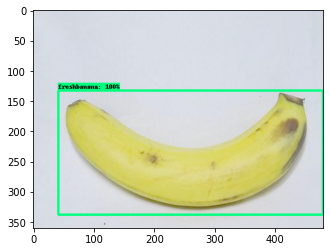

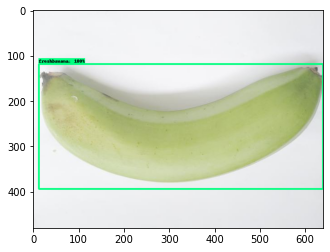

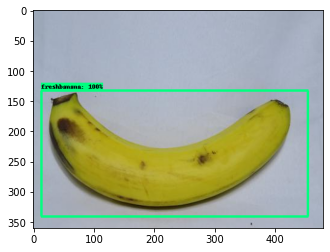

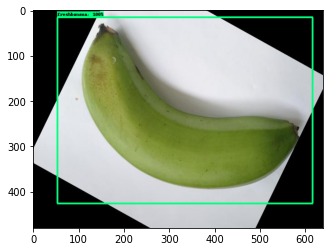

In [ ]:
for i in image_filenames:
  detect_func(i)

# Graph Freezing

In [ ]:
FREEZE_SCRIPT = os.path.join(workspaces['TFOD_API_PATH'], 'models', 'research', 'object_detection', 'exporter_main_v2.py')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], workspaces['CHECKPOINT_PATH'], workspaces['OUTPUT_PATH'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/my_model_zoo/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/my_model_zoo --output_directory=Tensorflow/workspace/my_model_zoo/export


In [ ]:
!{command}

2021-09-22 07:29:49.362107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:29:49.371799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:29:49.372549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:29:49.382145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:29:49.382856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Tensorflow Javascript (TFJS) Conversion

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.0 MB/s 


In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(workspaces['OUTPUT_PATH'], 'saved_model'), workspaces['TFJS_PATH'])

In [ ]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/my_model_zoo/export/saved_model Tensorflow/workspace/my_model_zoo/tfjsexport


In [ ]:
!{command}

2021-09-22 07:31:00.116103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:00.133372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:00.134150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:00.135266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:00.135956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# TF Lite Conversion

In [ ]:
TFLITE_SCRIPT = os.path.join(workspaces['TFOD_API_PATH'], 'models', 'research', 'object_detection', 'export_tflite_graph_tf2.py')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], workspaces['CHECKPOINT_PATH'], workspaces['TFLITE_PATH'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py --pipeline_config_path=Tensorflow/workspace/my_model_zoo/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/my_model_zoo --output_directory=Tensorflow/workspace/my_model_zoo/tfliteexport


In [ ]:
!{command}

2021-09-22 07:31:35.698919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:35.707433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:35.708172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:35.716766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 07:31:35.717542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# ZIP and Export Models

In [ ]:
!tar -czf models.tar.gz {workspaces['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
